In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/MLGroupProject/Dataset/")

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [4]:
matches = pd.read_csv('./kaggle_data/matches.csv')   
matches.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
240,241,2011,Jaipur,2011-04-12,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
533,534,2015,Bangalore,2015-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,18,0,Harbhajan Singh,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
79,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN
222,223,2010,Jaipur,2010-04-14,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,Royal Challengers Bangalore,0,5,KP Pietersen,Sawai Mansingh Stadium,BR Doctrove,S Ravi,NaN


In [5]:
delivery = pd.read_csv('./kaggle_data/deliveries.csv')
delivery.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
68386,289,2,Delhi Daredevils,Chennai Super Kings,7,5,DA Warner,CA Ingram,SK Raina,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
8993,38,2,Rising Pune Supergiant,Gujarat Lions,20,1,BA Stokes,DT Christian,JP Faulkner,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
171488,11319,2,Royal Challengers Bangalore,Kings XI Punjab,9,5,V Kohli,AB de Villiers,R Ashwin,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
171320,11319,1,Kings XI Punjab,Royal Challengers Bangalore,2,4,CH Gayle,KL Rahul,N Saini,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
110850,468,1,Kolkata Knight Riders,Royal Challengers Bangalore,8,1,CA Lynn,JH Kallis,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


## Basic Data Cleaning

In [6]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [7]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [8]:
print('Total Matches Played (in our dataset):',matches.shape[0])
print('Venues Played At-',matches['city'].unique())  

Total Matches Played (in our dataset): 756
Venues Played At- ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [9]:
print('Most man of the match awards:', (matches['player_of_match'].value_counts()).idxmax())
print('The team with the highest number of match wins: ', ((matches['winner']).value_counts()).idxmax())

Most man of the match awards: CH Gayle
The team with the highest number of match wins:  MI


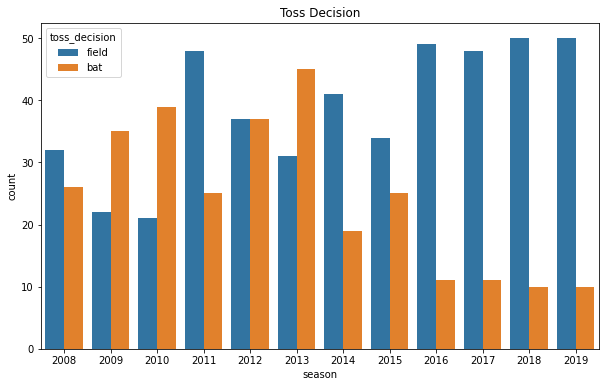

In [15]:
## Toss Decisions across Seasons
plt.subplots(figsize=(10,6))
plt.title("Toss Decision")
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

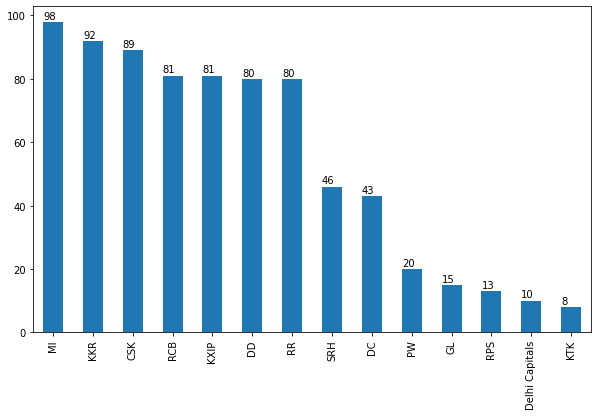

In [17]:
## Maximum Toss Winners
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+1))
plt.show()

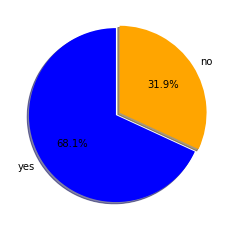

In [20]:
## Is Toss Winner Also the Match Winner?

df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['b','orange'])
plt.show()

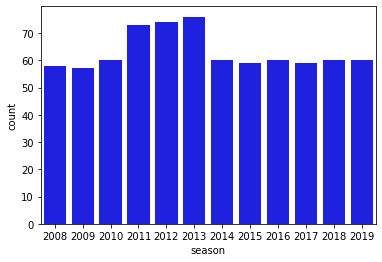

In [25]:
## Matches per season 
# plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches, color='b')  #countplot automatically counts the frequency of an item
# plt.show()

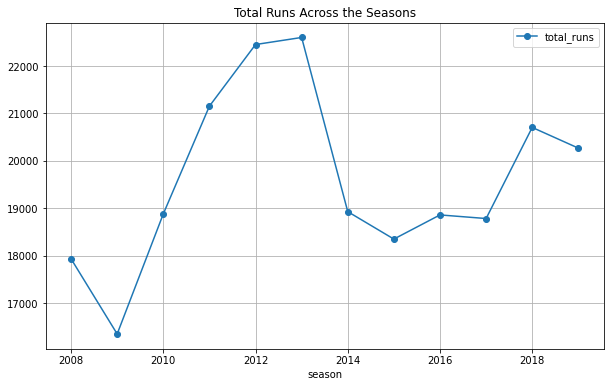

In [26]:
## Runs per season 
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.grid()
plt.title('Total Runs Across the Seasons')
plt.show()


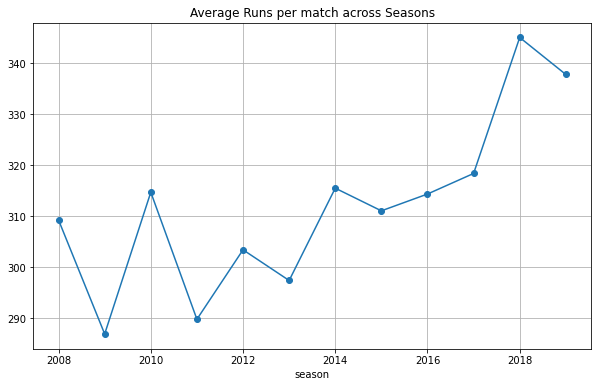

In [27]:
### Average runs 
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.grid()
plt.show()

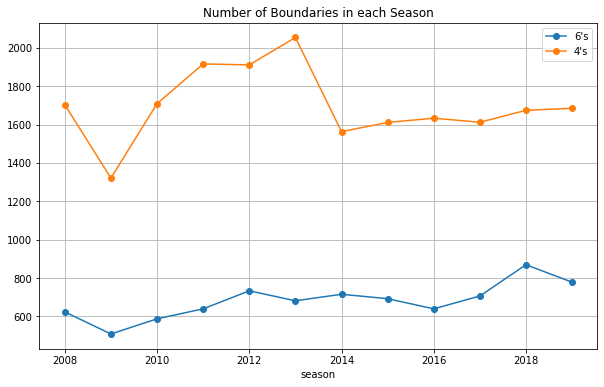

In [28]:
## Season wise 4s and 6s
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x': "6's",'batsman_runs_y':"4's"})
Season_boundaries.set_index('season')[["6's","4's"]].plot(marker='o')
fig=plt.gcf()
plt.title("Number of Boundaries in each Season")
fig.set_size_inches(10,6)
plt.grid()
plt.show()

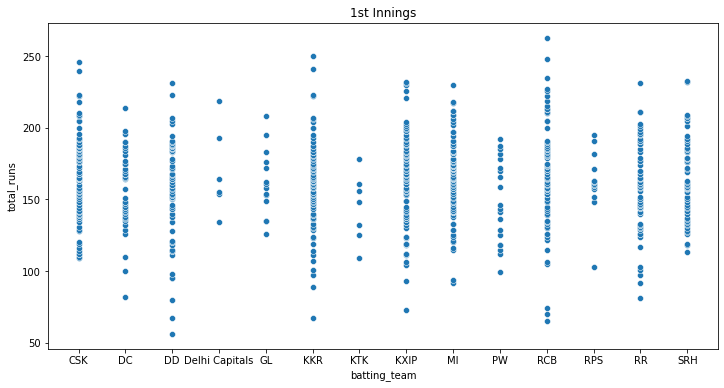

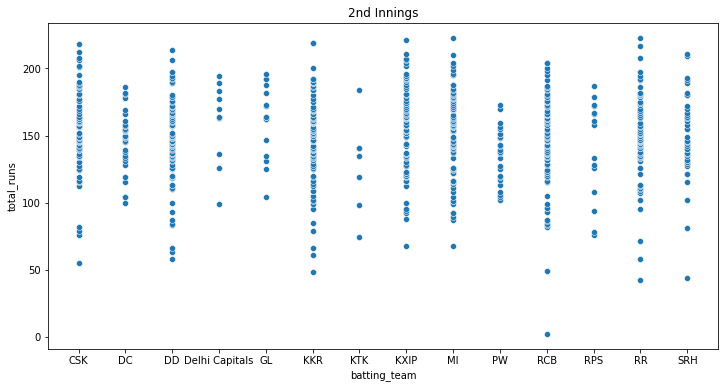

In [29]:
## Score distribution of teams per innings
plt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.scatterplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
sns.scatterplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=plt.gcf()
fig.set_size_inches(12,6)

In [30]:
## 10 highest scores 
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


In [31]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


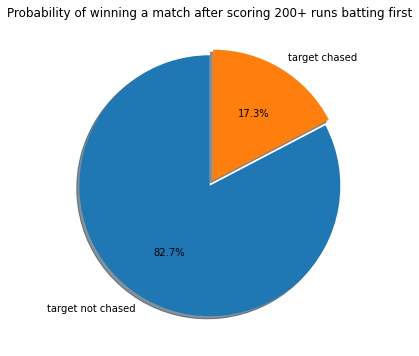

In [32]:
## Chasing 200+ score 
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title("Probability of winning a match after scoring 200+ runs batting first")
plt.show()

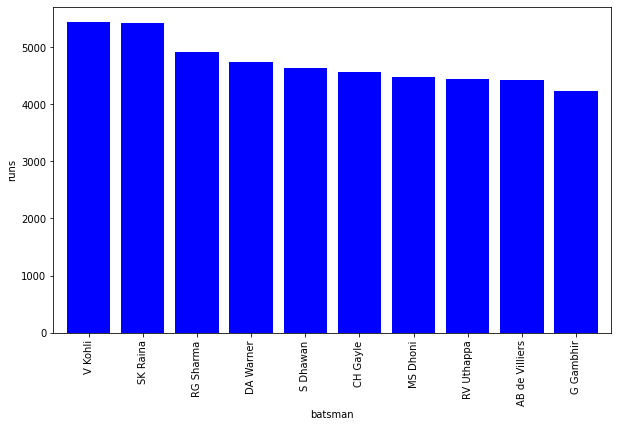

In [33]:
## Top batsmans 

plt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color='b')
plt.ylabel('runs')
plt.show()

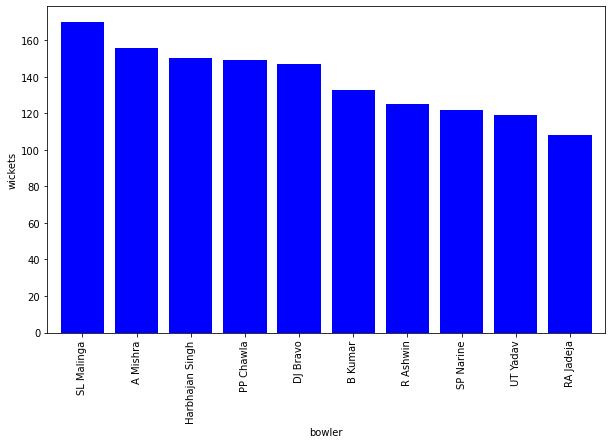

In [37]:
## Highest wicket taker
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color='b')
plt.ylabel('wickets')
plt.xlabel('bowler')
plt.show()



In [38]:
## Economy
eco=delivery.groupby(['bowler']).sum()
eco['total balls']=delivery['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


In [39]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,DW Steyn,R Ashwin,SP Narine,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.68665,6.75498,6.78753,7.04348,7.09293,7.23725,7.29167,7.40432,7.54617,7.61276


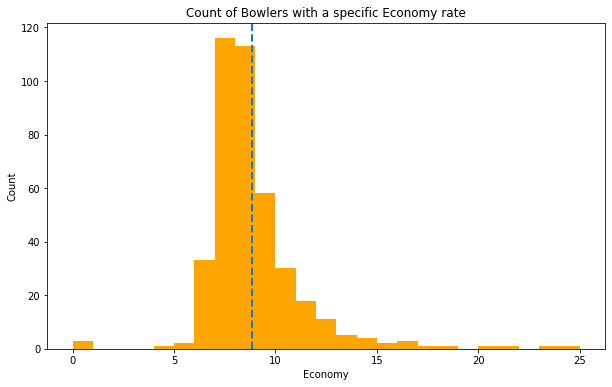

In [40]:
plt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
plt.hist(eco['economy'],bins,histtype="bar",color='orange')
plt.xlabel('Economy')
plt.ylabel('Count')
plt.axvline(eco["economy"].mean(),  linestyle='dashed', linewidth=2)
plt.title("Count of Bowlers with a specific Economy rate")
plt.plot()
plt.show()

# The average economy rate is between 8.5-9

The Top 10 Batsmen in the Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


Text(0.5, 1.0, 'Top 10 Batsmen')

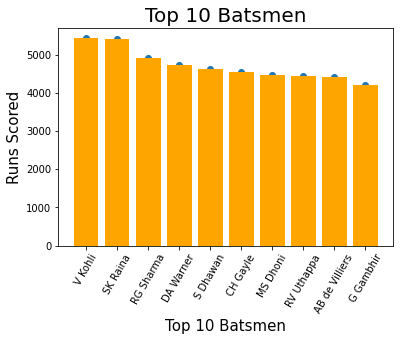

In [41]:
## highest batsman 
batting_tot=delivery.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in the Tournament are:\n',top_batsmen)
plt.bar(top_batsmen['batsman'],top_batsmen['Runs'], color="orange")
plt.scatter(top_batsmen['batsman'],top_batsmen['Runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=15)
plt.ylabel('Runs Scored',size=15)
plt.title('Top 10 Batsmen',size=20)

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
126  Harbhajan Singh     3440
7           A Mishra     3163
264        PP Chawla     3150
269         R Ashwin     3003
340       SL Malinga     2956
53           B Kumar     2699
93          DJ Bravo     2690
251          P Kumar     2625
381         UT Yadav     2588
347        SP Narine     2585


Text(0.5, 1.0, 'Top 10 Bowlers')

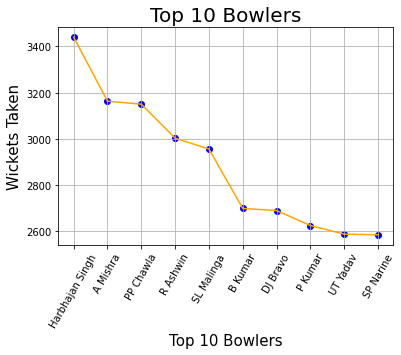

In [42]:
## wickets
bowling_wickets=delivery[delivery['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='blue')
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='orange')
plt.xticks(rotation=60)
plt.grid()
plt.xlabel('Top 10 Bowlers',size=15)
plt.ylabel('Wickets Taken',size=15)
plt.title('Top 10 Bowlers',size=20)

Top 20 Stadiums with the maximum number of Matches Played:
                                                 venue  Match Counts
8                                        Eden Gardens            77
40                                   Wankhede Stadium            73
17                              M Chinnaswamy Stadium            73
9                                    Feroz Shah Kotla            67
28          Rajiv Gandhi International Stadium, Uppal            56
20                    MA Chidambaram Stadium, Chepauk            49
32                             Sawai Mansingh Stadium            47
27         Punjab Cricket Association Stadium, Mohali            35
21            Maharashtra Cricket Association Stadium            21
5                          Dr DY Patil Sports Academy            17
37                         Subrata Roy Sahara Stadium            17
16                                          Kingsmead            15
26  Punjab Cricket Association IS Bindra Stadium, ...   

Text(0.5, 1.0, 'Top Stadiums')

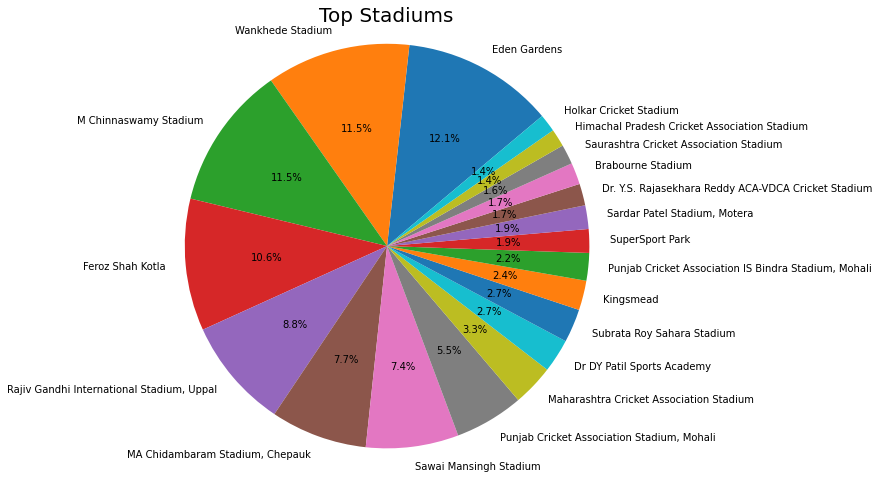

In [45]:
## venues
venue_counts=matches.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:20]
print('Top 20 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.figure(figsize=(8,8))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums',size=20)